In [1]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

In [44]:
import os
print(os.listdir("D:/Code/Code/Mohsin_FR"))

# Any results you write to the current directory are saved as output.

['data.yaml', 'README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid']


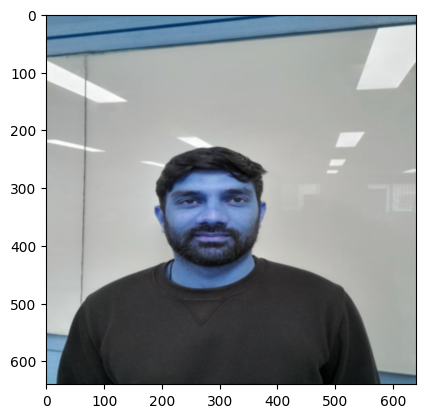

(640, 640, 3)


In [55]:
img = cv2.imread('D:/Code/Code/Mohsin_FR/train/images/20240409_132402_jpg.rf.9b97cc3fdfd70257ae3788e1f516c70d.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

1/1 [==============================] - 0s 76ms/step


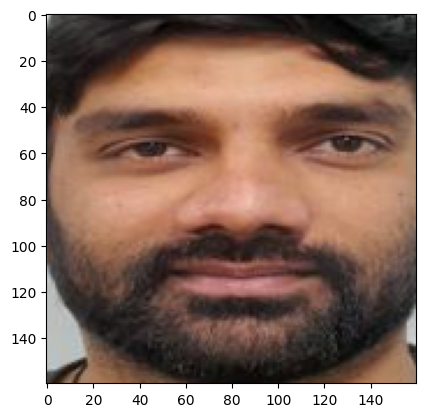

(160, 160, 3)


In [59]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('D:/Code/Code/Mohsin_FR/train/images/20240409_132402_jpg.rf.9b97cc3fdfd70257ae3788e1f516c70d.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [ ]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


# load train dataset
trainX, trainy = load_dataset('D:/Code/Code/Mohsin_FR/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('D:/Code/Code/Mohsin_FR/valid/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('face-colleague-dataset.npz', trainX, trainy, testX, testy)

1/1 [==============================] - 0s 14ms/step
